# Complément - Traitement de données avec _Pandas_

[__Pandas__](https://pandas.pydata.org/) est un module Python permettant les traitements de données. Il peut être intéressant dans le cadre de grands jeux de données voire de la gestion de système de base de données.

Un débat a traversé la liste de discussion nationale NSI il y quelques semaines sur l'usage de _Pandas_ ou de _SQL_ pour les traitements de données en Terminale. Mon idée n'est pas de trancher cette discussion mais simplement de présenter l'utilisation de base de la bibliothèque (et de matplotlib pour les représentations graphiques).

Si vous utilisez _Anaconda_, _Pandas_ est déjà installé.

Sinon on peut le faire avec ``pip install pandas`` depuis un terminal

L'usage classique est d'importer _Pandas_ avec un alias, ``pd`` le plus souvent :

In [1]:
import pandas as pd

_Pandas_ est efficace car il utilise les structures de tableau de _Numpy_. On importe aussi ce module :

In [2]:
import numpy as np

## Structure de données

_Pandas_ manipule essentiellement deux types d'objets :
* les séries
* les "dataframe"

Pour schématiser, une série est une colonne d'un tableau, un dataframe, le tableau dans son ensemble. Un dataframe peut donc être formé d'une ou plusieurs séries.

Notez qu'en plus des séries, le dataframe est muni d'un _index_ qui permet d'identifier les lignes (_row_ en anglais)

Un exemple :

In [3]:
# Création d'une série contenant les nombres 2, 2.5, 5, 3, 0
nombres = pd.Series([2, 2.5, 5, 3, 0])
nombres

0    2.0
1    2.5
2    5.0
3    3.0
4    0.0
dtype: float64

On remarque que _Pandas_ a typé tout seul nos données en _float64_. Cet attribut est accessible avec ``dtype`` :

In [4]:
nombres.dtype

dtype('float64')

On peut aussi créer des séries avec des valeurs qualitatives ou manquantes : 

In [5]:
qualit = pd.Series(["jaune", "bleu", np.nan, "vert"])
qualit

0    jaune
1     bleu
2      NaN
3     vert
dtype: object

Du coup pour créer un dataframe, on passe en argument les séries. On peut aussi en complément nommer les colonnes :

In [6]:
df = pd.DataFrame({"taille" : nombres, "couleur" : qualit})
df

taille couleur
0     2.0   jaune
1     2.5    bleu
2     5.0     NaN
3     3.0    vert
4     0.0     NaN

On remarque plusieurs choses :
* _Pandas_ a ajouté un ``NaN`` (Not a Number) pour la dernière valeur de la couleur afin de combler la case manquante
* les lignes sont numéroteés avec l'indice

On peut lister les colonnes, avoir leur types et l'index ainsi :

In [7]:
df.columns

Index(['taille', 'couleur'], dtype='object')

In [8]:
for col in df.columns :
    print(col)

taille
couleur


In [9]:
df.dtypes

taille     float64
couleur     object
dtype: object

In [10]:
df.index

RangeIndex(start=0, stop=5, step=1)

## Importation de données

Nous allons travailler avec des données sur les application du PlayStore Google provenant de [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps)

Pour importer les données on utilise la fonction ``read_csv`` :

In [11]:
apps = pd.read_csv("googleplaystore.csv")
len(apps)

10841

Les données sont plutôt longues (10841 lignes !). On peut n'afficher que les cinq premières lignes avec ``head``. On peut aussi passer en argument le nombre de lignes souhaitées.

In [12]:
apps.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

Et si on veut la fin du tableau ? On fait ``tail`` :

In [13]:
apps.tail()

App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Education     July 25, 2017                1.48   
10837       Everyone          Education      July 6, 2018                 1.0   
10838       Everyone            Medical  January 20, 2017                 1.0   
10839     Mature 17+  Books & Reference  January 19, 2015  Varies with device   
10840       Everyone          Lifestyle     July 25, 2018  Varies with device   

              Android Ver  
10836          4.1 and up  
10837          4.1 and up  
10838          2.2 and up  
10839  Varies with device  
10840  Varies with device

## Description des données :

Beaucoup de lignes, treize colonnes... Quels sont les types des colonnes ?

In [14]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

On veut un résumé des données :

In [15]:
apps.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

Une seule colonne ? En fait la fonction ``describe`` ne renvoie par défaut que les données des valeurs numériques et seul la série 'Rating' est numérique ici.

Pour avoir toutes les colonnes on précise notre demande (on inclut toutes les types) :

In [16]:
apps.describe(include='all')

App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Genres    Last Updated  \
count   10840  10841          10840  10841           10841   
unique      3     93              6    120            1378   
top      Free      0       Everyone  Tools  August 3, 2018   
freq    10039  10040           8714    842             326   
mean      NaN    NaN            NaN    NaN             NaN   
std       NaN    NaN            NaN    NaN             NaN   
min       NaN    NaN            NaN    NaN             NaN   
25%       NaN    NaN            NaN    NaN             NaN   
50%       NaN    NaN            NaN    NaN             NaN   
75%       NaN    NaN            NaN    NaN             NaN   
max       NaN    NaN            NaN    NaN             NaN   

               Current Ver Android Ver  
count                10833       10838  
unique                2832          33  
top     Varies with device  4.1 and up  
freq                  1459        2451  
mean                   NaN         NaN  
std                    NaN         NaN  
min                    NaN         NaN  
25%                    NaN         NaN  
50%                    NaN         NaN  
75%                    NaN         NaN  
max                    NaN         NaN

## Extraction de données (1) :

Comment faire pour ne travailler que sur une colonne ?

In [17]:
ratings = apps.Rating

In [18]:
type(ratings)

pandas.core.series.Series

In [19]:
ratings.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

Remarquez que l'on a ainsi récupéré une série.

On peut faire de la même façon :

In [20]:
ratings = apps['Rating']

In [21]:
type(ratings)

pandas.core.series.Series

In [22]:
ratings.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

Du coup pour extraire plusieurs colonnes : 

In [23]:
ratings_prices = apps[['Rating', 'Price']]

In [24]:
type(ratings_prices)

pandas.core.frame.DataFrame

In [25]:
ratings_prices.head()

Rating Price
0     4.1     0
1     3.9     0
2     4.7     0
3     4.5     0
4     4.3     0

## Graphiques :  

Une fois que l'on a extrait des colonnes, on peut faire des graphiques. Pour ce faire, on peut utiliser ``matplotlib`` :

In [26]:
import matplotlib.pyplot as plt

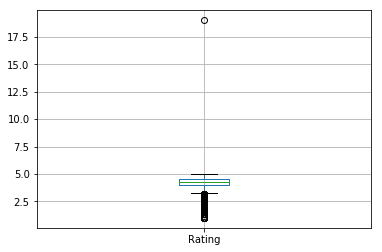

In [27]:
apps.boxplot()

Là encore, _Pandas_ s'est concentré sur les données numériques (le seul Rating).

Certaines valeurs ont l'air absurdes (notes au-dessus de 5)... Comment les extraire ?

## Extraction de données (2) :

Il est possible de sélectionner les données et filtrant un champ. Par exemple, pour récupérer les lignes où les notes sont inférieures ou égales à 5 :

In [28]:
notes_coherentes = apps.loc[apps['Rating'] <= 5]

In [29]:
type(notes_coherentes)

pandas.core.frame.DataFrame

In [30]:
len(notes_coherentes)

9366

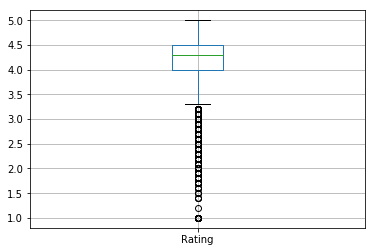

In [31]:
notes_coherentes.boxplot()

La ligne de sélection nécessite d'être expliquée :
* la méthode ``loc`` permet de localiser des données
* en argument, on lui passe un filtre : ``apps['Rating'] <= 5``

Le plus souvent on passe deux arguments à ``loc`` :
* la plage d'indice à utiliser
* les colonnes à prendre

Ici on a passé un seul filtre qui porte sur les lignes et permet donc de prendre toutes les colonnes. 

Quelques exemples plus techniques avec ``loc`` :

In [32]:
# Toutes les lignes et toutes les colonnes entre 'Rating' et 'Price', on fait un slicing
rating_to_price = apps.loc[:, 'Rating' : 'Price']

In [33]:
rating_to_price.head()

Rating Reviews  Size     Installs  Type Price
0     4.1     159   19M      10,000+  Free     0
1     3.9     967   14M     500,000+  Free     0
2     4.7   87510  8.7M   5,000,000+  Free     0
3     4.5  215644   25M  50,000,000+  Free     0
4     4.3     967  2.8M     100,000+  Free     0

In [34]:
# Les eules lignes pour lesquelles le 'Rating' est entre 3 et 5
# Notez l'utilisation des parenthèses pour former le filtre ainsi que le & au lieu de and
trois_a_cinq = apps.loc[ (apps['Rating'] >= 3) & (apps['Rating'] <= 5)]

In [35]:
len(trois_a_cinq)

9079

In [36]:
trois_a_cinq.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## Agrégation de données :

Nous avons plein de catégories dans ce jeu de données. Comment compter les apps d'une certaine catégorie ?

On groupe les données et on les compte :

In [37]:
apps_par_categories = apps.groupby('Category').count()

In [38]:
apps_par_categories

App  Rating  Reviews  Size  Installs  Type  Price  \
Category                                                                  
1.9                     1       1        1     1         1     1      1   
ART_AND_DESIGN         65      62       65    65        65    65     65   
AUTO_AND_VEHICLES      85      73       85    85        85    85     85   
BEAUTY                 53      42       53    53        53    53     53   
BOOKS_AND_REFERENCE   231     178      231   231       231   231    231   
BUSINESS              460     303      460   460       460   460    460   
COMICS                 60      58       60    60        60    60     60   
COMMUNICATION         387     328      387   387       387   387    387   
DATING                234     195      234   234       234   234    234   
EDUCATION             156     155      156   156       156   156    156   
ENTERTAINMENT         149     149      149   149       149   149    149   
EVENTS                 64      45       64    64        64    64     64   
FAMILY               1972    1747     1972  1972      1972  1971   1972   
FINANCE               366     323      366   366       366   366    366   
FOOD_AND_DRINK        127     109      127   127       127   127    127   
GAME                 1144    1097     1144  1144      1144  1144   1144   
HEALTH_AND_FITNESS    341     297      341   341       341   341    341   
HOUSE_AND_HOME         88      76       88    88        88    88     88   
LIBRARIES_AND_DEMO     85      65       85    85        85    85     85   
LIFESTYLE             382     314      382   382       382   382    382   
MAPS_AND_NAVIGATION   137     124      137   137       137   137    137   
MEDICAL               463     350      463   463       463   463    463   
NEWS_AND_MAGAZINES    283     233      283   283       283   283    283   
PARENTING              60      50       60    60        60    60     60   
PERSONALIZATION       392     314      392   392       392   392    392   
PHOTOGRAPHY           335     317      335   335       335   335    335   
PRODUCTIVITY          424     351      424   424       424   424    424   
SHOPPING              260     238      260   260       260   260    260   
SOCIAL                295     259      295   295       295   295    295   
SPORTS                384     319      384   384       384   384    384   
TOOLS                 843     734      843   843       843   843    843   
TRAVEL_AND_LOCAL      258     226      258   258       258   258    258   
VIDEO_PLAYERS         175     160      175   175       175   175    175   
WEATHER                82      75       82    82        82    82     82   

                     Content Rating  Genres  Last Updated  Current Ver  \
Category                                                                 
1.9                               0       1             1            1   
ART_AND_DESIGN                   65      65            65           64   
AUTO_AND_VEHICLES                85      85            85           85   
BEAUTY                           53      53            53           53   
BOOKS_AND_REFERENCE             231     231           231          230   
BUSINESS                        460     460           460          460   
COMICS                           60      60            60           60   
COMMUNICATION                   387     387           387          387   
DATING                          234     234           234          234   
EDUCATION                       156     156           156          156   
ENTERTAINMENT                   149     149           149          149   
EVENTS                           64      64            64           64   
FAMILY                         1972    1972          1972         1969   
FINANCE                         366     366           366          366   
FOOD_AND_DRINK                  127     127           127          127   
GAME                           1144    1144          1144      

La catégorie '1.9' a l'air absurde : on la retire !

In [39]:
# On utilise drop avec une condition
apps_categories_propres = apps.drop(apps[apps['Category'] == '1.9'].index)

In [40]:
apps_par_categories = apps_categories_propres.groupby('Category').count()

In [41]:
apps_par_categories

App  Rating  Reviews  Size  Installs  Type  Price  \
Category                                                                  
ART_AND_DESIGN         65      62       65    65        65    65     65   
AUTO_AND_VEHICLES      85      73       85    85        85    85     85   
BEAUTY                 53      42       53    53        53    53     53   
BOOKS_AND_REFERENCE   231     178      231   231       231   231    231   
BUSINESS              460     303      460   460       460   460    460   
COMICS                 60      58       60    60        60    60     60   
COMMUNICATION         387     328      387   387       387   387    387   
DATING                234     195      234   234       234   234    234   
EDUCATION             156     155      156   156       156   156    156   
ENTERTAINMENT         149     149      149   149       149   149    149   
EVENTS                 64      45       64    64        64    64     64   
FAMILY               1972    1747     1972  1972      1972  1971   1972   
FINANCE               366     323      366   366       366   366    366   
FOOD_AND_DRINK        127     109      127   127       127   127    127   
GAME                 1144    1097     1144  1144      1144  1144   1144   
HEALTH_AND_FITNESS    341     297      341   341       341   341    341   
HOUSE_AND_HOME         88      76       88    88        88    88     88   
LIBRARIES_AND_DEMO     85      65       85    85        85    85     85   
LIFESTYLE             382     314      382   382       382   382    382   
MAPS_AND_NAVIGATION   137     124      137   137       137   137    137   
MEDICAL               463     350      463   463       463   463    463   
NEWS_AND_MAGAZINES    283     233      283   283       283   283    283   
PARENTING              60      50       60    60        60    60     60   
PERSONALIZATION       392     314      392   392       392   392    392   
PHOTOGRAPHY           335     317      335   335       335   335    335   
PRODUCTIVITY          424     351      424   424       424   424    424   
SHOPPING              260     238      260   260       260   260    260   
SOCIAL                295     259      295   295       295   295    295   
SPORTS                384     319      384   384       384   384    384   
TOOLS                 843     734      843   843       843   843    843   
TRAVEL_AND_LOCAL      258     226      258   258       258   258    258   
VIDEO_PLAYERS         175     160      175   175       175   175    175   
WEATHER                82      75       82    82        82    82     82   

                     Content Rating  Genres  Last Updated  Current Ver  \
Category                                                                 
ART_AND_DESIGN                   65      65            65           64   
AUTO_AND_VEHICLES                85      85            85           85   
BEAUTY                           53      53            53           53   
BOOKS_AND_REFERENCE             231     231           231          230   
BUSINESS                        460     460           460          460   
COMICS                           60      60            60           60   
COMMUNICATION                   387     387           387          387   
DATING                          234     234           234          234   
EDUCATION                       156     156           156          156   
ENTERTAINMENT                   149     149           149          149   
EVENTS                           64      64            64           64   
FAMILY                         1972    1972          1972         1969   
FINANCE                         366     366           366          366   
FOOD_AND_DRINK                  127     127           127          127   
GAME                           1144    1144          1144         1144   
HEALTH_AND_FITNESS              341     341           341          341   
HOUSE_AND_HOME                   88      88            88       

Du coup, on peut faire un graphique :

<BarContainer object of 33 artists>

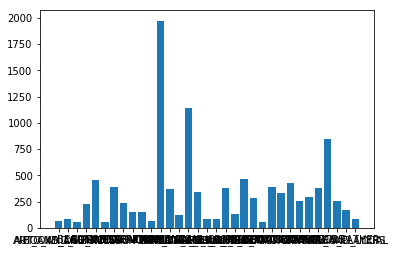

In [42]:
plt.bar(x=apps_par_categories.index, height = apps_par_categories.App)

C'est le bazar... On fait un peu de mise en forme :
* on agrandit la figure (dans les notebooks)
* on trie les données
* on met de la couleur
* on ajoute un titre et une grille
* on tourne les étiquettes pour faciliter la lecture

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text xticklabel objects>)

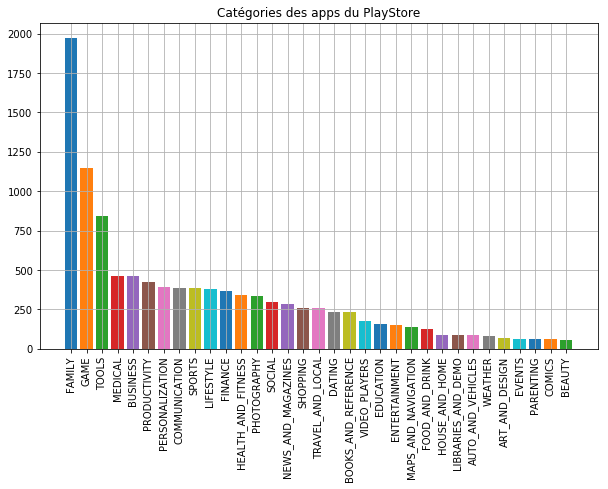

In [43]:
# Taille des figures
plt.rcParams['figure.figsize'] = [10, 6]

# Import des couleurs
import matplotlib.colors as mcolors

# Le tri
apps_par_categories.sort_values(by = 'App', inplace = True, ascending = False)

# Le graphe (la couleur est à la fin)
plt.bar(x=apps_par_categories.index, height = apps_par_categories.App, color = mcolors.TABLEAU_COLORS)

# Le titre
plt.title("Catégories des apps du PlayStore")

# La grille
plt.grid(True)

# Rotation des étiquettes à la verticale
plt.xticks(rotation=90)

## Prétraitement des données :

Nous l'avons vu, seule la colonne 'Rating' est du type numérique. Le prix devrait quand-même l'être... Quel est le problème ?

On affiche les valeurs prises dans cette colonne :

In [44]:
apps.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

On comprend mieux :
* certaines données commencent par un '$'
* on a le '0' aussi
* et un 'Everyone' surprenant...

Du coup, on retire ce 'Everyone' :

In [45]:
prix_propres = apps.drop(apps[apps['Price'] == 'Everyone'].index)

Ensuite il faut ôter le $ devant les prix... On va donc créer une nouvelle colonne 'Prix', fixée à 0 au départ puis la remplir avec les nouveau prix :

In [46]:
prix_propres['Prix'] = 0
prix_propres.sort_values(by = 'Price', ascending = True, inplace = True)
prix_propres.head()

App         Category  Rating Reviews  \
5260               AJ Gray Dark Icon Pack  PERSONALIZATION     5.0       2   
6919                           HD Widgets  PERSONALIZATION     4.3   58614   
8359   Diseño de columnas NTC - RSEE 2017     PRODUCTIVITY     NaN       6   
10697                             Mu.F.O.             GAME     5.0       2   
4779                   X Back - Icon Pack  PERSONALIZATION     4.5      56   

       Size    Installs  Type  Price Content Rating           Genres  \
5260    35M         10+  Paid  $0.99       Everyone  Personalization   
6919    26M  1,000,000+  Paid  $0.99       Everyone  Personalization   
8359   2.8M        100+  Paid  $0.99       Everyone     Productivity   
10697   16M          1+  Paid  $0.99       Everyone           Arcade   
4779    26M     10,000+  Paid  $0.99       Everyone  Personalization   

           Last Updated Current Ver Android Ver  Prix  
5260     April 29, 2018         1.1  4.1 and up     0  
6919   December 7, 2016       4.3.2  4.4 and up     0  
8359     March 26, 2018         2.0  4.1 and up     0  
10697     March 3, 2017         1.0  2.3 and up     0  
4779      June 29, 2018       1.6.2  4.1 and up     0

In [47]:
for indice, ligne in prix_propres.iterrows() :
    if ligne['Price'] != '0' :
        prix_propres.loc[indice,'Prix'] = ligne['Price'][1:]

In [48]:
prix_propres.tail()

App   Category  Rating  \
3654                                  Yandex.Weather    WEATHER     4.5   
3655          Local Weather Forecast & Visual Widget    WEATHER     4.5   
3656                           Wetter by t-online.de    WEATHER     4.2   
3638                                   Klara weather    WEATHER     4.6   
10840  iHoroscope - 2018 Daily Horoscope & Astrology  LIFESTYLE     4.5   

      Reviews                Size     Installs  Type Price Content Rating  \
3654   309617  Varies with device  10,000,000+  Free     0       Everyone   
3655     3478                6.1M     500,000+  Free     0       Everyone   
3656    24349                9.2M   1,000,000+  Free     0       Everyone   
3638    36900                4.8M     500,000+  Free     0       Everyone   
10840  398307                 19M  10,000,000+  Free     0       Everyone   

          Genres    Last Updated         Current Ver         Android Ver Prix  
3654     Weather   July 23, 2018  Varies with device  Varies with device    0  
3655     Weather  August 2, 2018              2.9.10          4.2 and up    0  
3656     Weather    May 14, 2018             1.8.4.5          4.1 and up    0  
3638     Weather   July 28, 2018               1.3.6          4.0 and up    0  
10840  Lifestyle   July 25, 2018  Varies with device  Varies with device    0

On a donc nos données mais ce sont des objets...

In [49]:
prix_propres.Prix.dtype

dtype('O')

On les convertit en 'float' :

In [50]:
prix_propres.Prix = pd.to_numeric(prix_propres.Prix)

In [51]:
prix_propres.Prix.dtype

dtype('float64')

Du coup, on peut enfin calculer les descripteurs :

In [52]:
prix_propres.describe()

Rating          Prix
count  9366.000000  10840.000000
mean      4.191757      1.027368
std       0.515219     15.949703
min       1.000000      0.000000
25%       4.000000      0.000000
50%       4.300000      0.000000
75%       4.500000      0.000000
max       5.000000    400.000000

On peut même faire un graphe du prix en fonction du note :

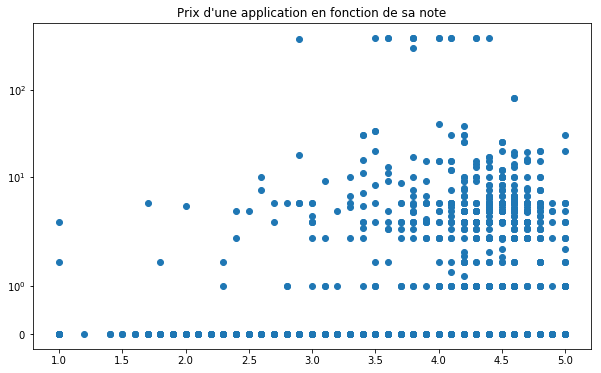

In [53]:
# <echelle logarithmique sur les ordonnées
plt.yscale("symlog")

plt.title("Prix d'une application en fonction de sa note")
plt.scatter(prix_propres.Rating, prix_propres.Prix)

## Fusion de tables :

Le jeu de données sur les applications est fourni avec une seconde table contenant les "reviews" :

In [146]:
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

In [147]:
reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [148]:
reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [149]:
len(reviews)

64295

Certaines lignes sont en double :

In [150]:
reviews[reviews['App'] == '10 Best Foods for You'].sort_values(by = 'Translated_Review').head()

App                       Translated_Review Sentiment  \
166  10 Best Foods for You  10 best foods 4u Excellent chose foods  Positive   
66   10 Best Foods for You  10 best foods 4u Excellent chose foods  Positive   
48   10 Best Foods for You     A big thanks ds I got bst gd health  Positive   
148  10 Best Foods for You     A big thanks ds I got bst gd health  Positive   
33   10 Best Foods for You          Absolutely Fabulous Phenomenal  Positive   

     Sentiment_Polarity  Sentiment_Subjectivity  
166                1.00                    0.65  
66                 1.00                    0.65  
48                 0.10                    0.15  
148                0.10                    0.15  
33                 0.45                    0.75

On les retire avec ``drop_duplicates`` :

In [151]:
reviews.drop_duplicates(inplace = True)

In [152]:
reviews[reviews['App'] == '10 Best Foods for You'].sort_values(by = 'Translated_Review').head()

App                       Translated_Review Sentiment  \
66  10 Best Foods for You  10 best foods 4u Excellent chose foods  Positive   
48  10 Best Foods for You     A big thanks ds I got bst gd health  Positive   
33  10 Best Foods for You          Absolutely Fabulous Phenomenal  Positive   
6   10 Best Foods for You                                 Amazing  Positive   
24  10 Best Foods for You                   An excellent A useful  Positive   

    Sentiment_Polarity  Sentiment_Subjectivity  
66                1.00                    0.65  
48                0.10                    0.15  
33                0.45                    0.75  
6                 0.60                    0.90  
24                0.65                    0.50

In [153]:
len(reviews)

30679

Certaines lignes sont vides (``NaN``), on va les retirer avec ``dropna``. On précise les colonnes que l'on souhaite filtrer.

In [154]:
reviews.dropna(subset=['Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace = True)

In [155]:
reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [156]:
len(reviews)

29697

Comme on peut le voir les apps sont identifées par leur nom. On peut donc fusionner les tables en prenant 'App' comme clé : 

In [165]:
apps_reviews = pd.merge(reviews,
                        apps,
                        how = 'right',
                        on = 'App')

In [166]:
apps_reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You         Works great especially going grocery store   
3  10 Best Foods for You                                       Best idea us   
4  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity            Category  \
0  Positive                1.00                0.533333  HEALTH_AND_FITNESS   
1  Positive                0.25                0.288462  HEALTH_AND_FITNESS   
2  Positive                0.40                0.875000  HEALTH_AND_FITNESS   
3  Positive                1.00                0.300000  HEALTH_AND_FITNESS   
4  Positive                1.00                0.300000  HEALTH_AND_FITNESS   

   Rating Reviews  Size  Installs  Type Price Content Rating  \
0     4.0    2490  3.8M  500,000+  Free     0   Everyone 10+   
1     4.0    2490  3.8M  500,000+  Free     0   Everyone 10+   
2     4.0    2490  3.8M  500,000+  Free     0   Everyone 10+   
3     4.0    2490  3.8M  500,000+  Free     0   Everyone 10+   
4     4.0    2490  3.8M  500,000+  Free     0   Everyone 10+   

             Genres       Last Updated Current Ver   Android Ver  
0  Health & Fitness  February 17, 2017         1.9  2.3.3 and up  
1  Health & Fitness  February 17, 2017         1.9  2.3.3 and up  
2  Health & Fitness  February 17, 2017         1.9  2.3.3 and up  
3  Health & Fitness  February 17, 2017         1.9  2.3.3 and up  
4  Health & Fitness  February 17, 2017         1.9  2.3.3 and up

In [167]:
apps_reviews.describe()

Sentiment_Polarity  Sentiment_Subjectivity        Rating
count        46739.000000            46739.000000  54840.000000
mean             0.169887                0.493895      4.298186
std              0.342439                0.250927      0.349289
min             -1.000000                0.000000      1.000000
25%              0.000000                0.368673      4.200000
50%              0.138807                0.512500      4.400000
75%              0.390000                0.645000      4.500000
max              1.000000                1.000000     19.000000